In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from scipy.stats import f
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
#CO2 flooding technique in extraction of crude oil
# Multiple regression to find dependance of oil recovery on pressure of CO2 and dipping angle

data= pd.DataFrame({
    'oil':[60.58,72.72,79.99,66.83,80.78,89.78,69.18,80.31,91.99], #oil recovery percentage
    'pressure':[1000,1000,1000,1500,1500,1500,2000,2000,2000],
    'angle':[0,15,30,0,15,30,0,15,30] #dipping angle
})

#data
y= data['oil']
x=data.drop(['oil'],axis=1)

array([[<Axes: xlabel='oil', ylabel='oil'>,
        <Axes: xlabel='pressure', ylabel='oil'>,
        <Axes: xlabel='angle', ylabel='oil'>],
       [<Axes: xlabel='oil', ylabel='pressure'>,
        <Axes: xlabel='pressure', ylabel='pressure'>,
        <Axes: xlabel='angle', ylabel='pressure'>],
       [<Axes: xlabel='oil', ylabel='angle'>,
        <Axes: xlabel='pressure', ylabel='angle'>,
        <Axes: xlabel='angle', ylabel='angle'>]], dtype=object)

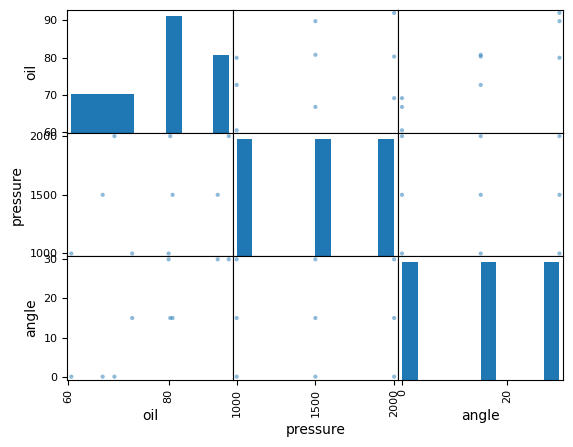

In [ ]:
pd.plotting.scatter_matrix(data)

In [ ]:
X_multiple=sm.add_constant(data[['pressure','angle']])
model=sm.OLS(data['oil'],X_multiple).fit()
print(model.summary())
#p-values are very small

                            OLS Regression Results                            
Dep. Variable:                    oil   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     73.39
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           6.06e-05
Time:                        08:46:20   Log-Likelihood:                -18.798
No. Observations:                   9   AIC:                             43.60
Df Residuals:                       6   BIC:                             44.19
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.9500      3.190     16.284      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
#fitting a plane
b0,b1,b2=model.params
print(f'Coefficients: {b0},{b1},{b2}')
pressure_range=np.linspace(data['pressure'].min(),data['pressure'].max(),10)
angle_range=np.linspace(data['angle'].min(),data['angle'].max(),10)
pressure_mesh,angle_mesh=np.meshgrid(pressure_range,angle_range)
plane=b0+b1*pressure_mesh+b2*angle_mesh

Coefficients: 51.95000000000032,0.009396666666666498,0.7241111111111092


Text(0.5, 0, 'Oil recovery')

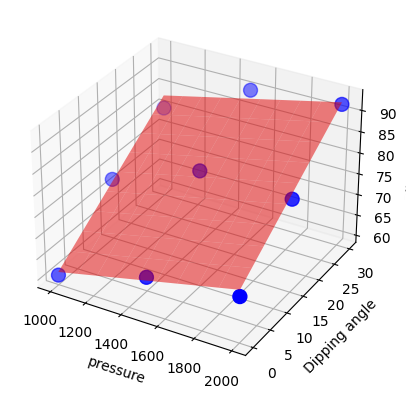

In [ ]:
#mesh plot

fig=plt.figure()
ax= fig.add_subplot(111,projection='3d')
ax.scatter(data['pressure'],data['angle'],data['oil'],color='blue',s=100)
ax.plot_surface(pressure_mesh,angle_mesh,plane,color='red',alpha=0.5)

ax.set_xlabel('pressure')
ax.set_ylabel('Dipping angle')
ax.set_zlabel('Oil recovery')

In [ ]:
#MSE calculation
model2=LinearRegression()
model2.fit(x,y)
y_pred=model2.predict(x)
mean_squared_error(y,y_pred)

3.8166629629629636